In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.preprocessing import normalize
import numpy as np
import time


ROOT_DATA_DIR = '../data/raw/'

%matplotlib inline

## Find all bag files and images

In [2]:
def listdir_fullpath(dir):
    folder_list = [os.path.join(dir, folder) for folder in os.listdir(dir)]
    folder_list.sort()
    return folder_list

bags_list = listdir_fullpath(ROOT_DATA_DIR)

In [3]:
rgb_path_list = []
for root, dirs, files in os.walk(bags_list[0]):
    for name in files:
        if name.endswith((".png")) & ("depth" not in str(root)):
            rgb_path_list.append(os.path.join(root, name))

# Remove identical images from sequence

**Usual approaches** -> [link](https://pyimagesearch.com/2014/09/15/python-compare-two-images/)
- Mean Squared Error (MSE)
  - golbal image
  - faster to compute
- Structural Similarity Index (SSIM)
  - implemented by `scikit-image`
  - generally slower
  - focuses on local patches
- Keypoint methods: SIFT, SURF, ORB

In [4]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
    
def compare_images(imageA, imageB, title, plot=False):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	if plot:
		# setup the figure
		fig = plt.figure(title)
		plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
		# show first image
		ax = fig.add_subplot(1, 2, 1)
		plt.imshow(imageA, cmap = plt.cm.gray)
		plt.axis("off")
		# show the second image
		ax = fig.add_subplot(1, 2, 2)
		plt.imshow(imageB, cmap = plt.cm.gray)
		plt.axis("off")
		# show the images
		plt.show()

	return m, s

In [5]:
def loop_image_comparison(rgb_path: str):
    mse_list = []
    ssim_list = []
    first_image = rgb_path_list[-2]
    rgb_range = rgb_path_list
    for image in rgb_range:
        im = cv2.imread(first_image,cv2.IMREAD_GRAYSCALE)
        im2 = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        m, s = compare_images(im, im2, "title", plot=False)
        mse_list.append(m)
        ssim_list.append(s)
        first_image = image

    # max_mse = max(mse_list)
    # ssim_list = list(map(lambda x: x*max_mse, ssim_list))

    mse_list_norm = normalize([mse_list])
    
        
    plt.plot(range(0, len(rgb_range)), mse_list_norm[0], label="mse")
    plt.plot(range(0, len(rgb_range)), ssim_list, label="ssim")
    plt.legend()
    plt.show()


In [6]:
# loop_image_comparison(rgb_path_list)

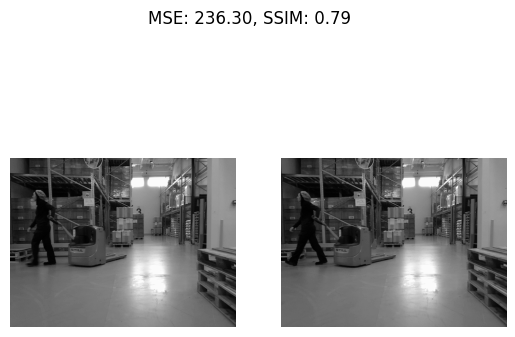

(236.30066731770833, 0.7863417967836004)

In [12]:
im = cv2.imread(rgb_path_list[2815],cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(rgb_path_list[2817],cv2.IMREAD_GRAYSCALE)

compare_images(im, im2, "Example", plot=True)

In [8]:
im = cv2.imread(rgb_path_list[5],cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(rgb_path_list[6],cv2.IMREAD_GRAYSCALE)
tic = time.perf_counter()
np.array_equal(im, im2)
toc = time.perf_counter()
print(toc-tic)
tic = time.perf_counter()
ssim(im, im2)
toc = time.perf_counter()
print(toc-tic)

0.00027886899624718353
0.06987837799533736
